Необходимо ответить на вопрос:
как влияет заполнение полей заказа на конверсию в оплату в различных разрезах? по предметам/источникам пользователей и т.д.

user_id - уникальный айди пользователя  
order_id - уникальный айди заказа  
type_id - тип заказа  
category_id - предмет заказа  
title - длина названия заказа  
description - длина описания заказа  
creation - дата создания заказа  
deadline - дата дедлайна заказа  
wordsFrom - нижняя граница слов в выполненном заказе  
wordsTo - верхняя граница слов в выполненном заказе  
source_of_user - источник пользователя  
is_paid - оплачен ли заказ  
is_test - тестовый ли пользователь  
file_count - кол-во приклепленных файлов к заказу за первые 10 минут  

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = [10, 7]

#### Загрузка таблицы с удалением дублирующихся заказов

In [266]:
data = pd.read_csv('C:\\Users\\Андрей Клычев\\Downloads\\Telegram Desktop\\test_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop_duplicates('order_id')
data

,user_id,order_id,type_id,category_id,title,description,creation,deadline,wordsFrom,wordsTo,source_of_user,is_paid,is_test,file_count
0,17251,17250.0,1.0,16.0,14.0,53.0,2015-10-01 21:01:44,2015-10-23 09:04:47,275.0,275.0,NaN,0.0,1.0,0.0
1,12299,NaN,1.0,13.0,24.0,0.0,2015-09-24 22:11:55,2015-10-02 09:04:47,1100.0,2200.0,5.0,0.0,0.0,0.0
2,720,624.0,15.0,176.0,15.0,0.0,2015-09-03 12:11:01,2015-09-10 09:04:47,825.0,1650.0,5.0,0.0,0.0,0.0
3,6187,6119.0,NaN,1.0,41.0,0.0,2015-09-15 16:46:20,2015-09-23 09:04:47,1100.0,NaN,0.0,0.0,0.0,0.0
4,21360,21372.0,1.0,1.0,48.0,0.0,2015-10-07 15:09:01,2015-10-09 09:04:47,300.0,300.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13286,25245,25296.0,NaN,19.0,NaN,393.0,2015-10-13 12:14:40,2015-10-14 03:04:48,1100.0,1100.0,1.0,0.0,0.0,0.0
13356,33415,33524.0,1.0,NaN,44.0,0.0,2015-10-26 13:02:50,2015-11-02 09:04:47,1650.0,1650.0,5.0,0.0,0.0,0.0
13395,20484,20493.0,1.0,NaN,55.0,0.0,2015-10-06 16:37:51,2015-10-14 09:04:47,1100.0,1100.0,1.0,0.0,0.0,0.0
13397,18527,18530.0,1.0,42.0,108.0,0.0,2015-10-04 07:22:06,2015-10-04 19:34:48,1650.0,1650.0,5.0,0.0,0.0,0.0


#### Расчет вспомогательных метрик, и преобразование данных:

In [267]:
#Приведение формата даты

creation_date = []
deadline_date = []

def date_formating(column, lst):
    for _ in data.index:
        try:
            lst.append(pd.Timestamp(data[column][_]))
            
        except:
            lst.append('none')
    
    return lst
        
data.creation = date_formating('creation', creation_date)
data.deadline = date_formating('deadline', deadline_date)


# Расчет дня недели
day_of_week_start = []
day_of_week_deadline = []

for _ in data.index:
    try:
        day_of_week_start.append(data.creation[_].dayofweek)
    
    except:
        day_of_week_start.append('none')
        
for _ in data.index:
    try:
        day_of_week_deadline.append(data.deadline[_].dayofweek)
    
    except:
        day_of_week_deadline.append('none')
        
data['day_of_creation'] = day_of_week_start
data['day_of_deadline'] = day_of_week_deadline

# Расчет часа заказа

hour_of_day = []
# day_of_week_deadline = []

for _ in data.index:
    try:
        hour_of_day.append(data.creation[_].hour)
    
    except:
        hour_of_day.append('none')
        
data['hour_of_day'] = hour_of_day
        
# Расчет длительности дедлайна
order_duration = []


for _ in data.index:
    try:
        order_duration.append((data.deadline[_] - data.creation[_]).days)
            
    except:
        order_duration.append(np.nan)
    

data['order_duration'] = order_duration

#### Отфильтруем выбросы, значения с дедлайном в несколько тысяч дней

In [268]:
data.order_duration.fillna(500)
data_filtered = data[(-50 < data.order_duration) & (data.order_duration < 20)]


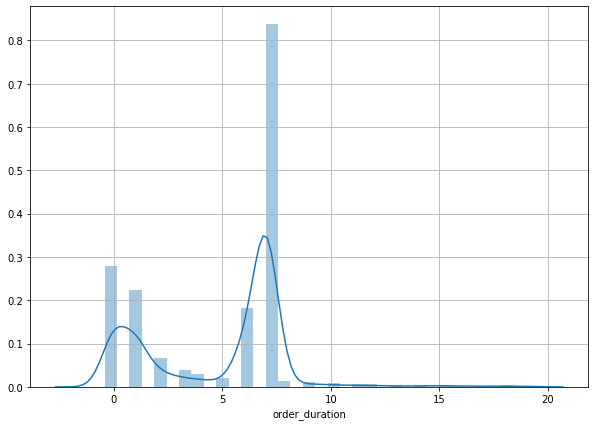

In [269]:
sns.distplot(data_filtered.order_duration)
plt.grid()
plt.show()

#### Наиболее частый дедлайн - 7 дней, после него идет - 0 и 1 дней

### Сводные значения по дням недели заказа (day_of_creation)

In [270]:
week_d = pd.pivot_table(data_filtered, index='day_of_creation', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])
week_d.index = ("Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье")

week_d

,mean,count,sum
,is_paid,is_paid,is_paid
Понедельник,0.081200,1367,111.0
Вторник,0.090263,1407,127.0
Среда,0.074561,1368,102.0
Четверг,0.094386,1229,116.0
Пятница,0.089385,895,80.0
Суббота,0.116851,813,95.0
Воскресенье,0.102410,1162,119.0


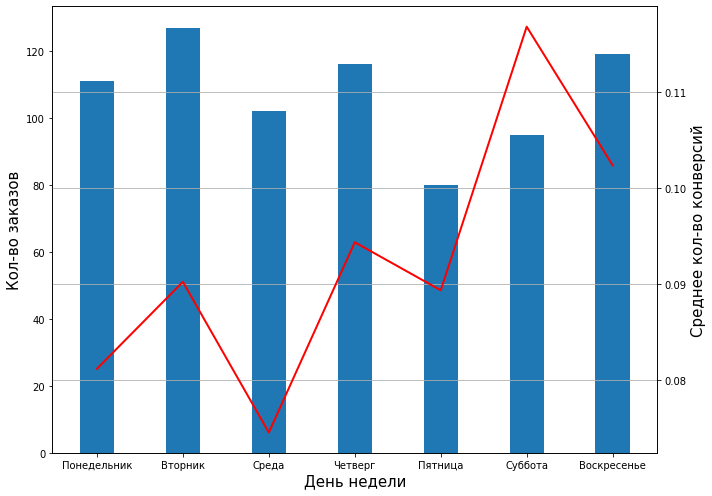

In [271]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(week_d[('count', 'is_paid')].index, week_d[('sum', 'is_paid')].values, width=0.4, label='')
ax2.plot(week_d[('count', 'is_paid')].index, week_d[('mean', 'is_paid')].values, color='r', linewidth=2)

ax1.set_xlabel('День недели', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

Чаще всего заказы делаются во вторник, четверг и воскресенье, наиболее результативными по конверсии являются выходные дни

### Сводные значения по дням недели срока выполнения заказа (day_of_deadline)

In [272]:
week_ddln = pd.pivot_table(data_filtered, index='day_of_deadline', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])

week_ddln.index = ("Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье")

week_ddln

,mean,count,sum
,is_paid,is_paid,is_paid
Понедельник,0.080309,1295,104.0
Вторник,0.080793,1312,106.0
Среда,0.073552,1278,94.0
Четверг,0.085908,1327,114.0
Пятница,0.100271,1107,111.0
Суббота,0.096663,869,84.0
Воскресенье,0.130104,1053,137.0


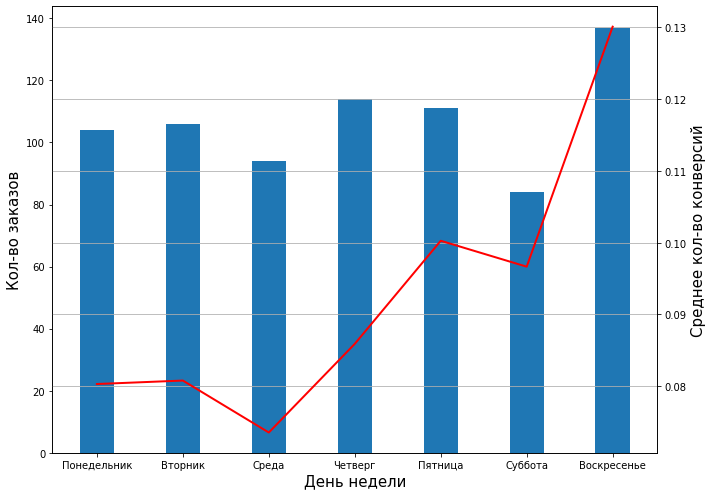

In [273]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(week_ddln[('count', 'is_paid')].index, week_ddln[('sum', 'is_paid')].values, width=0.4, label='')
ax2.plot(week_ddln[('count', 'is_paid')].index, week_ddln[('mean', 'is_paid')].values, color='r', linewidth=2)

ax1.set_xlabel('День недели', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

Как мы можем наблюдать на графике, чаще всего оплачиваются заказы выполненные в выходные и в пятницу  
(исполнители имеют больше свободного времени)

### Сводные значения по часам создания (hour_of_day)

In [274]:
day_w = pd.pivot_table(data_filtered, index='hour_of_day', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])

day_w.head()

,mean,count,sum
,is_paid,is_paid,is_paid
hour_of_day,,,
0.0,0.036437,247,9.0
1.0,0.065693,274,18.0
2.0,0.066372,452,30.0
3.0,0.068293,410,28.0
4.0,0.099773,441,44.0


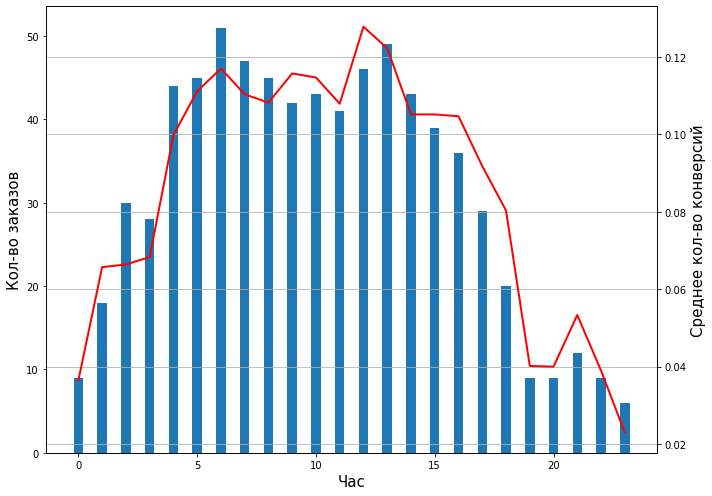

In [275]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(day_w[('count', 'is_paid')].index, day_w[('sum', 'is_paid')].values, width=0.4, label='')
ax2.plot(day_w[('count', 'is_paid')].index, day_w[('mean', 'is_paid')].values, color='r', linewidth=2)

ax1.set_xlabel('Час', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

Количество оплаченных заказов, и средняя конверсия оплаты очень сильно кореллируют. Наибольшаий объем заявок приходится на время с 4 утра до 13 часов дня

### Сводные значения по источникам пользователя (source_of_user)

In [276]:
source = pd.pivot_table(data_filtered, index='source_of_user', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])
source

,mean,count,sum
,is_paid,is_paid,is_paid
source_of_user,,,
0.0,0.118761,581,69.0
1.0,0.148745,3227,480.0
2.0,0.316456,316,100.0
3.0,0.032051,156,5.0
4.0,0.333333,21,7.0
5.0,0.013776,3557,49.0


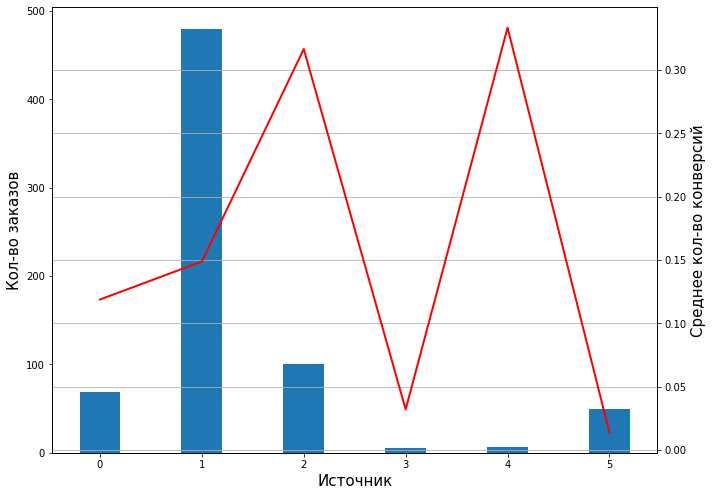

In [277]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(source[('count', 'is_paid')].index, source[('sum', 'is_paid')].values, width=0.4, label='')
ax2.plot(source[('count', 'is_paid')].index, source[('mean', 'is_paid')].values, color='r', linewidth=2)

ax1.set_xlabel('Источник', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

На графике видно, что самым эффективным каналом (источником) привлечения пользователей является канал №1, по-скольку он имеет  
высокое среднеее количество оплаченных заказов (приходят достаточно релеванные пользователи) при большом объеме использования,  
так же обратить внимание на источники № 0 и № 2, они показывают неплохое среднее значение конверсий при умеренных значениях привлечения

### Сводные значения по предметам заказа (category_id)

In [280]:
category = pd.pivot_table(data_filtered, index='category_id', values='is_paid', 
                   aggfunc=['mean', 'count', 'sum'])

cat_c = category.loc[(category[('count', 'is_paid')] > 50)]
cat_c.head(10)

,mean,count,sum
,is_paid,is_paid,is_paid
category_id,,,
1.0,0.087603,2420,212.0
2.0,0.050980,255,13.0
3.0,0.070175,57,4.0
5.0,0.165775,187,31.0
6.0,0.143836,146,21.0
8.0,0.255814,86,22.0
9.0,0.132353,68,9.0
10.0,0.278689,61,17.0


По-скольку категорий очень много, для визуализации данные были профильтрованы для большей наглядности

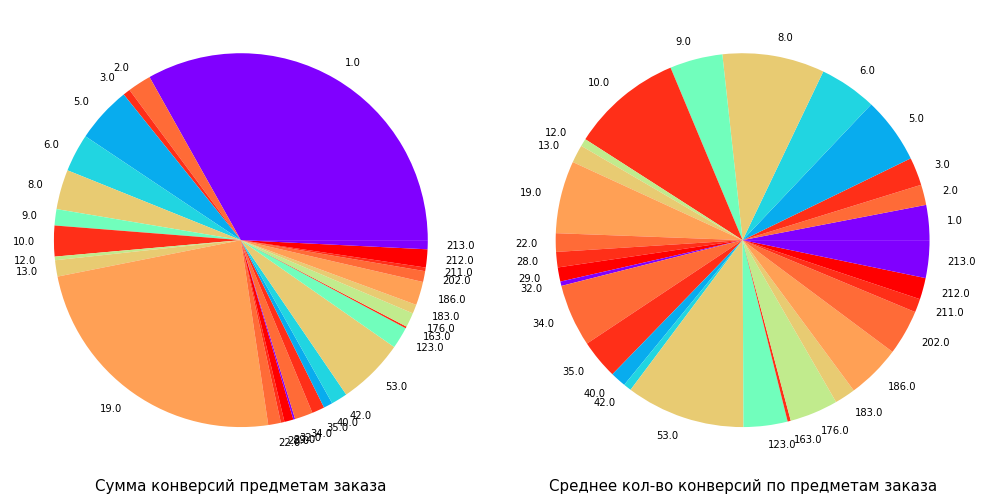

In [281]:
matplotlib.rcParams['figure.figsize'] = [14, 7]
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("rainbow")
ax1.pie(cat_c[('sum', 'is_paid')], labels = cat_c.index, colors=cmap([0, 220, 240, 60, 80, 180, 120, 240, 160, 180, \
                                                                        200, 220, 240, 260]))
ax2.pie(cat_c[('mean', 'is_paid')], labels = cat_c.index,\
        colors=cmap([0, 220, 240, 60, 80, 180, 120, 240, 160, 180, 200, 220, 240, 260]))

ax1.set_xlabel('Сумма конверсий предметам заказа', size=15)
ax2.set_xlabel('Среднее кол-во конверсий по предметам заказа', size=15)

fig.tight_layout()

plt.show()

Самые популярные предметы (темы) заказов 1 и 19
Самые конверсионные (с учетом популярности):1, 5, 19, 53

### Сводные значения по длине названия заказа (title)

In [283]:
title = pd.pivot_table(data_filtered, index='title', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])
title

,mean,count,sum
,is_paid,is_paid,is_paid
title,,,
1.0,0.000000,6,0.0
2.0,0.000000,21,0.0
3.0,0.016393,61,1.0
4.0,0.017442,172,3.0
5.0,0.063218,174,11.0
...,...,...,...
106.0,0.066667,15,1.0
107.0,0.000000,9,0.0


In [284]:
title[title[('count', 'is_paid')] == title[('count', 'is_paid')].max()]

,mean,count,sum
,is_paid,is_paid,is_paid
title,,,
16.0,0.094828,348,33.0


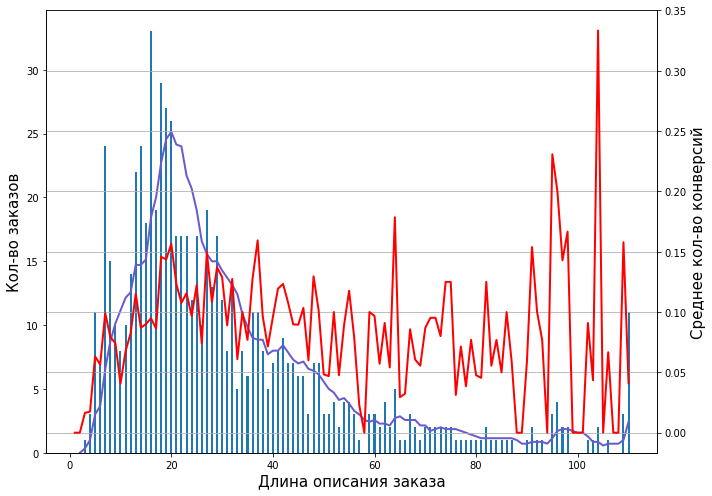

In [285]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(title[('count', 'is_paid')].index, title[('sum', 'is_paid')].values, width=0.4, label='')
ax2.plot(title[('count', 'is_paid')].index, title[('mean', 'is_paid')].values, color='r', linewidth=2)
ax1.plot(title[('count', 'is_paid')].index, title[('sum', 'is_paid')].rolling(7, min_periods=2).mean(), color='slateblue',
        linewidth=2)

ax1.set_xlabel('Длина описания заказа', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

Наиболее распространенное значение длины описание заказа - 16 символов, если смотреть шире, то это диапазон от 10 до 30 символов, предполагаю, что такое описание лаконично и понятно, и такие заказы чаще принимают исполнители.  
Длинные описания заказов редки, но имеют достаточно высокую среднюю конверсию.

### Сводные значения по нижней границе слов в выполненном заказе (wordsFrom)

In [286]:
wordsF = pd.pivot_table(data_filtered, index='wordsFrom', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])

wordsFiltered = wordsF[wordsF[('sum', 'is_paid')] > 0]
wordsFiltered.head(10)

,mean,count,sum
,is_paid,is_paid,is_paid
wordsFrom,,,
0.0,0.047478,337,16.0
275.0,0.081456,1154,94.0
280.0,0.333333,3,1.0
300.0,0.272727,44,12.0
325.0,0.500000,4,2.0
350.0,0.200000,20,4.0
400.0,0.227273,22,5.0
430.0,1.000000,1,1.0


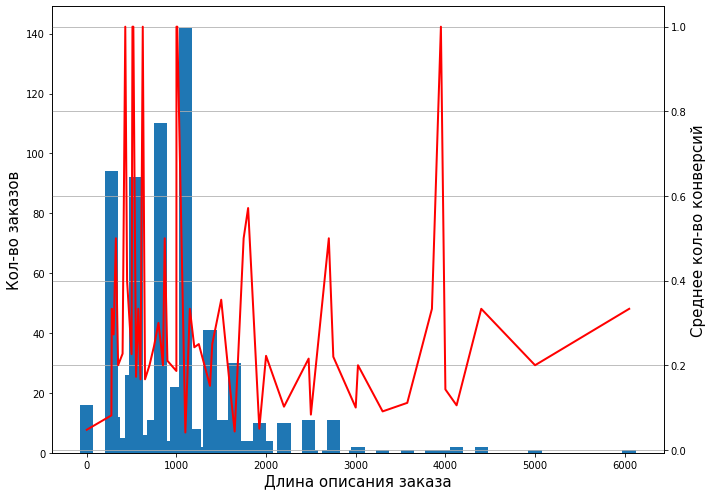

In [287]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(wordsFiltered[('count', 'is_paid')].index, wordsFiltered[('sum', 'is_paid')].values, width=150, label='')
ax2.plot(wordsFiltered[('count', 'is_paid')].index, wordsFiltered[('mean', 'is_paid')].values, color='r', linewidth=2)
# ax1.plot(title[('count', 'is_paid')].index, title[('sum', 'is_paid')].rolling(7, min_periods=2).mean(), color='slateblue',
#         linewidth=2)

ax1.set_xlabel('Длина описания заказа', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

### Сводные значения по верхней границе слов в выполненном заказе (wordsTo)

In [316]:
wordsT = pd.pivot_table(data_filtered, index='wordsTo', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])

wordsT = wordsT[wordsT[('sum', 'is_paid')] > 0]
wordsT.head()

,mean,count,sum
,is_paid,is_paid,is_paid
wordsTo,,,
0.0,0.049231,325,16.0
275.0,0.080961,1124,91.0
280.0,0.333333,3,1.0
300.0,0.275000,40,11.0
325.0,0.500000,4,2.0


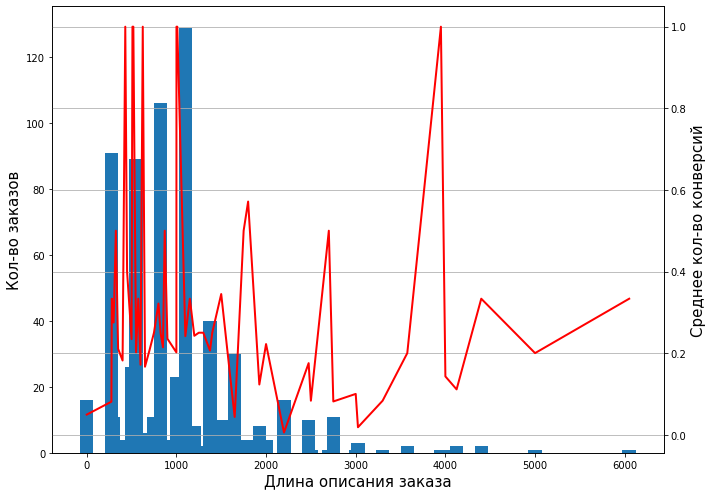

In [315]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(wordsT[('count', 'is_paid')].index, wordsT[('sum', 'is_paid')].values, width=150, label='')
ax2.plot(wordsT[('count', 'is_paid')].index, wordsT[('mean', 'is_paid')].values, color='r', linewidth=2)

ax1.set_xlabel('Длина описания заказа', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

### Сводные значения по количеству приложенных файлов за первые 10 мин (file_count)

In [290]:
data_f = pd.pivot_table(data_filtered, index='file_count', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])

data_f = data_f[data_f[('count', 'is_paid')] > 3]
data_f

,mean,count,sum
,is_paid,is_paid,is_paid
file_count,,,
0.0,0.077127,7533,581.0
1.0,0.337748,151,51.0
2.0,0.379747,79,30.0
3.0,0.516129,31,16.0
4.0,0.650000,20,13.0
5.0,0.636364,11,7.0
6.0,0.400000,5,2.0


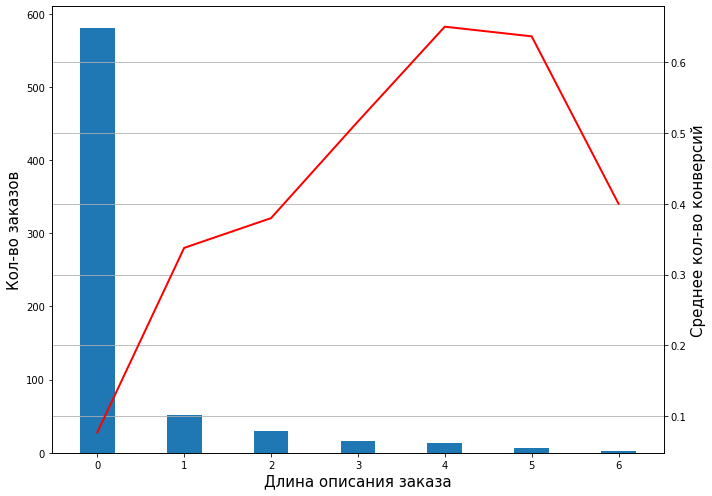

In [291]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(data_f[('count', 'is_paid')].index, data_f[('sum', 'is_paid')].values, width=0.4, label='')
ax2.plot(data_f[('count', 'is_paid')].index, data_f[('mean', 'is_paid')].values, color='r', linewidth=2)

ax1.set_xlabel('Длина описания заказа', size=15)
ax1.set_ylabel('Кол-во заказов', size=15)
ax2.set_ylabel('Среднее кол-во конверсий', size=15)
fig.tight_layout()
plt.grid()
plt.show()

На графике видно, что в подавляющем числе случаев к заказам не прикрепляются файлы (в первые 10 минут),  
при этом видна обратная коррелляция между числом приложенных  файлов и средней конверсией таких заказов

### Сводные значения по тестовым аккаунтам (is_test)

In [292]:
data_t = pd.pivot_table(data_filtered, index='is_test', values='is_paid',
                   aggfunc=['mean', 'count', 'sum'])

data_t

,mean,count,sum
,is_paid,is_paid,is_paid
is_test,,,
0.0,0.092191,7799,719.0
1.0,0.016393,183,3.0


С тестовых аккаунтов происходила оплата только в 3 случаях из 183 (1.6% случаев)

##### Выводы:
    
##### По итогам проведенного исследования можно сказать следующее:
    
##### 1) Сильно влияет день недели, в который был создан заказ, наибольшая конверсия происходит от заказов,  сделанных в пятницу и выходные дни  
##### 2) Заказы как правило происходят в период с 4 до 13 часов  
##### 3) Самым эффективным источником конверсии является источник №0  
##### 4) Самые поплурные темы заказов - №1 и №19, а самые конверсионные (с учетом объема заказов) № 5, 19 и 53  
##### 5) Самая частая длина заказа - в диапазоне от 16 до 30 символов, в то же время, при этом средняя конверсия тоже высокая в этом  диапазоне
##### 6) Количество приложенных файлов приложенных в первые 10 минут обратно корреллируеьт со средней конверсией